In [86]:
import pandas as pd
import scanpy as sc
from scipy.io import mmread
from scipy import sparse
import numpy as np
from scipy.optimize import fsolve, root, basinhopping
import matplotlib.pyplot as plt
import h5py
import csv
import os
import loompy
import anndata
from pandas import HDFStore
from sklearn.manifold import TSNE
import collections
import scipy.sparse as sp_sparse
import tables
import plotly.express as px

In [87]:
feature_matrix = mmread("../Data/FeatureMatrix.mtx")

In [88]:
feature_matrix_precise = mmread("../Data/FeatureMatrix_precise.mtx")

In [89]:
genes = pd.read_csv("../Data/Genes.csv")
barcode_positions = pd.read_csv("../Data/SpotPositions.csv")
ScatterPies = pd.read_csv("../Data/SpotClusterMembership.csv")
GeneExpression = pd.read_csv("../Data/ClusterGeneExpression.csv")

In [5]:
feature_matrix_precise

<31053x3499 sparse matrix of type '<class 'numpy.int64'>'
	with 13742662 stored elements in COOrdinate format>

In [6]:
barcode_positions

barcode        x        y     radius
0     AAACAAGTATCTCCCA-1  12709.0  10806.0  71.192911
1     AAACACCAATAACTGC-1   3616.0  12513.0  71.192911
2     AAACAGAGCGACTCCT-1  11839.0   3944.0  71.192911
3     AAACAGGGTCTATATT-1   2961.0  10225.0  71.192911
4     AAACATTTCCCGGATT-1  12159.0  12902.0  71.192911
...                  ...      ...      ...        ...
3494  TTGTTGTGTGTCAAGA-1   9974.0   7183.0  71.192911
3495  TTGTTTCACATCCAGG-1   6136.0  12325.0  71.192911
3496  TTGTTTCATTAGTCTA-1   4821.0  12705.0  71.192911
3497  TTGTTTCCATACAACT-1   4495.0   9846.0  71.192911
3498  TTGTTTGTGTAAATTC-1   7130.0   2606.0  71.192911

[3499 rows x 4 columns]

In [7]:
genes

gene     feature_type
0                Xkr4  Gene Expression
1              Gm1992  Gene Expression
2             Gm37381  Gene Expression
3                 Rp1  Gene Expression
4               Sox17  Gene Expression
...               ...              ...
31048      AC168977.1  Gene Expression
31049      AC149090.1  Gene Expression
31050  CAAA01118383.1  Gene Expression
31051        Vmn2r122  Gene Expression
31052  CAAA01147332.1  Gene Expression

[31053 rows x 2 columns]

In [8]:
genes_base1 = genes
barcode_positions_base1 = barcode_positions
genes_base1.index = genes_base1.index + 1
barcode_positions_base1.index = barcode_positions_base1.index + 1

In [9]:
barcode_positions_base1.iloc[0]

barcode    AAACAAGTATCTCCCA-1
x                     12709.0
y                     10806.0
radius              71.192911
Name: 1, dtype: object

In [10]:
genes_base1.iloc[30976]

gene                 AC123873.3
feature_type    Gene Expression
Name: 30977, dtype: object

In [11]:
df_precise = pd.DataFrame.sparse.from_spmatrix(feature_matrix_precise)

# df_precise.columns = barcode_positions['barcode']
# df_precise.index = genes['gene']

# df_precise = df_precise.transpose()
df_precise

0     1     2     3     4     5     6     7     8     9     ...  3489  \
0         0     0     0     0     0     0     0     1     0     1  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
31048     0     0     0     0     0     0     0     0     0     0  ...     0   
31049     0     0     2     0     0     0     4     3     2     5  ...     0   
31050     0     0     0     0     0     0     0     1     0     1  ...     0   
31051     0     0     0     0     0     0     0     0     0     0  ...     0   
31052     0     0     0     0     0     0     0     0     0     0  ...     0   

       3490  3491  3492  3493  3494  3495  3496  3497  3498  
0         1     1     1     2     0     1     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
31048     0     0     0     0     0     0     0     0     0  
31049     0     0     1     3     1     1     0     1     2  
31050     0     0     1     0     0     0     0     0     0  
31051     0     0     0     0     0     0     0     0     0  
31052     0     0     0     0     0     0     0     0     0  

[31053 rows x 3499 columns]

In [13]:
print("barcode:", df_precise.index[0], "gene:", df_precise.columns[15], "UMI counts:", df_precise.iloc[0,15])
print("barcode:", df_precise.index[0], "gene:", df_precise.columns[6], "UMI counts:", df_precise.iloc[0,6])
print("barcode:", df_precise.index[1], "gene:", df_precise.columns[61], "UMI counts:", df_precise.iloc[1,61])
print("barcode:", df_precise.index[1], "gene:", df_precise.columns[38], "UMI counts:", df_precise.iloc[1,38])
print("barcode:", df_precise.index[1], "gene:", df_precise.columns[25], "UMI counts:", df_precise.iloc[1,25])
print("barcode:", df_precise.index[167], "gene:", df_precise.columns[1], "UMI counts:", df_precise.iloc[167,1])
print("barcode:", df_precise.index[3463], "gene:", df_precise.columns[1], "UMI counts:", df_precise.iloc[3464,1])


barcode: 0 gene: 15 UMI counts: 0
barcode: 0 gene: 6 UMI counts: 0
barcode: 1 gene: 61 UMI counts: 0
barcode: 1 gene: 38 UMI counts: 0
barcode: 1 gene: 25 UMI counts: 0
barcode: 167 gene: 1 UMI counts: 0
barcode: 3463 gene: 1 UMI counts: 0


In [14]:
df = pd.DataFrame.sparse.from_spmatrix(feature_matrix_precise, index=genes['gene'].values, columns=barcode_positions['barcode'].values)

df_test = df.transpose()
df_test

Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
AAACAAGTATCTCCCA-1     0       0        0    0      0        0       2   
AAACACCAATAACTGC-1     0       0        0    0      0        0       0   
AAACAGAGCGACTCCT-1     0       0        0    0      0        0       1   
AAACAGGGTCTATATT-1     0       0        0    0      0        0       0   
AAACATTTCCCGGATT-1     0       0        0    0      0        0       0   
...                  ...     ...      ...  ...    ...      ...     ...   
TTGTTGTGTGTCAAGA-1     0       0        0    0      0        0       1   
TTGTTTCACATCCAGG-1     1       0        0    0      0        0       0   
TTGTTTCATTAGTCTA-1     0       0        0    0      0        0       0   
TTGTTTCCATACAACT-1     0       0        0    0      0        0       3   
TTGTTTGTGTAAATTC-1     0       0        0    0      0        0       2   

                    Lypla1  Gm37988  Tcea1  ...  AC125149.1  AC125149.2  \
AAACAAGTATCTCCCA-1       0        0      0  ...           0           0   
AAACACCAATAACTGC-1       0        0      0  ...           0           0   
AAACAGAGCGACTCCT-1       0        0      0  ...           0           0   
AAACAGGGTCTATATT-1       0        0      0  ...           0           0   
AAACATTTCCCGGATT-1       0        0      0  ...           0           0   
...                    ...      ...    ...  ...         ...         ...   
TTGTTGTGTGTCAAGA-1       0        0      0  ...           0           0   
TTGTTTCACATCCAGG-1       0        0      0  ...           0           0   
TTGTTTCATTAGTCTA-1       0        0      0  ...           0           0   
TTGTTTCCATACAACT-1       0        0      3  ...           0           0   
TTGTTTGTGTAAATTC-1       0        0      0  ...           0           0   

                    AC125149.4  AC234645.1  AC168977.2  AC168977.1  \
AAACAAGTATCTCCCA-1           0           0           0           0   
AAACACCAATAACTGC-1           0           0           0           0   
AAACAGAGCGACTCCT-1           0           0           0           0   
AAACAGGGTCTATATT-1           0           0           0           0   
AAACATTTCCCGGATT-1           0           0           0           0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1           0           0           0           0   
TTGTTTCACATCCAGG-1           0           0           0           0   
TTGTTTCATTAGTCTA-1           0           0           0           0   
TTGTTTCCATACAACT-1           0           0           0           0   
TTGTTTGTGTAAATTC-1           0           0           0           0   

                    AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  
AAACAAGTATCTCCCA-1           0               0         0               0  
AAACACCAATAACTGC-1           0               0         0               0  
AAACAGAGCGACTCCT-1           2               0         0               0  
AAACAGGGTCTATATT-1           0               0         0               0  
AAACATTTCCCGGATT-1           0               0         0               0  
...                        ...             ...       ...             ...  
TTGTTGTGTGTCAAGA-1           1               0         0               0  
TTGTTTCACATCCAGG-1           1               0         0               0  
TTGTTTCATTAGTCTA-1           0               0         0               0  
TTGTTTCCATACAACT-1           1               0         0               0  
TTGTTTGTGTAAATTC-1           2               0         0               0  

[3499 rows x 31053 columns]

In [15]:
######### WRONG #########
feature_matrix = sparse.csc_matrix(feature_matrix)
row_names = barcode_positions.iloc[:, 0].values
column_names = genes.iloc[:, 0].values
FeatureMatrix_df = pd.DataFrame.sparse.from_spmatrix(
    feature_matrix, index=row_names, columns=column_names
)
FeatureMatrix_df

Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
AAACAAGTATCTCCCA-1   2.0       0        0    0      0        0       0   
AAACACCAATAACTGC-1     0       0        0    0      0        0       0   
AAACAGAGCGACTCCT-1     0       0        0    0      0        0     2.0   
AAACAGGGTCTATATT-1     0       0        0    0      0        0       0   
AAACATTTCCCGGATT-1   1.0       0        0    0      0        0       0   
...                  ...     ...      ...  ...    ...      ...     ...   
TTGTTGTGTGTCAAGA-1     0       0        0    0      0        0     1.0   
TTGTTTCACATCCAGG-1     0       0        0    0      0        0       0   
TTGTTTCATTAGTCTA-1   1.0       0        0    0      0        0     2.0   
TTGTTTCCATACAACT-1   1.0       0        0    0      0        0       0   
TTGTTTGTGTAAATTC-1     0       0        0    0      0        0       0   

                    Lypla1  Gm37988  Tcea1  ...  AC125149.1  AC125149.2  \
AAACAAGTATCTCCCA-1       0        0      0  ...           0           0   
AAACACCAATAACTGC-1       0        0      0  ...           0           0   
AAACAGAGCGACTCCT-1       0        0    3.0  ...           0           0   
AAACAGGGTCTATATT-1       0        0      0  ...           0           0   
AAACATTTCCCGGATT-1       0        0    5.0  ...           0           0   
...                    ...      ...    ...  ...         ...         ...   
TTGTTGTGTGTCAAGA-1       0        0    1.0  ...           0           0   
TTGTTTCACATCCAGG-1       0        0      0  ...           0           0   
TTGTTTCATTAGTCTA-1       0        0    5.0  ...           0           0   
TTGTTTCCATACAACT-1       0        0      0  ...           0           0   
TTGTTTGTGTAAATTC-1       0        0    1.0  ...           0           0   

                    AC125149.4  AC234645.1  AC168977.2  AC168977.1  \
AAACAAGTATCTCCCA-1           0           0           0           0   
AAACACCAATAACTGC-1           0           0           0           0   
AAACAGAGCGACTCCT-1           0           0           0           0   
AAACAGGGTCTATATT-1           0           0           0           0   
AAACATTTCCCGGATT-1           0           0           0           0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1           0           0           0           0   
TTGTTTCACATCCAGG-1           0           0           0           0   
TTGTTTCATTAGTCTA-1           0           0           0           0   
TTGTTTCCATACAACT-1           0           0           0           0   
TTGTTTGTGTAAATTC-1           0           0           0           0   

                    AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  
AAACAAGTATCTCCCA-1         2.0               0         0               0  
AAACACCAATAACTGC-1           0             2.0         0               0  
AAACAGAGCGACTCCT-1         1.0             1.0         0               0  
AAACAGGGTCTATATT-1           0               0         0               0  
AAACATTTCCCGGATT-1           0               0         0               0  
...                        ...             ...       ...             ...  
TTGTTGTGTGTCAAGA-1         1.0               0         0               0  
TTGTTTCACATCCAGG-1           0               0         0               0  
TTGTTTCATTAGTCTA-1         3.0             1.0         0               0  
TTGTTTCCATACAACT-1           0               0         0               0  
TTGTTTGTGTAAATTC-1         2.0               0         0               0  

[3499 rows x 31053 columns]

In [16]:
GeneExpression

CellType      Xkr4        Gm1992       Gm37381           Rp1     Sox17  \
0       X1  0.016405  1.388843e-20  3.720076e-41  4.444050e-04  0.004436   
1       X2  0.014320  8.828156e-07  3.720076e-41  6.510778e-04  0.003817   
2       X3  0.003112  8.383861e-09  3.720076e-41  6.856137e-08  0.001293   
3       X4  0.075535  1.637971e-14  3.720076e-41  6.809215e-09  0.005139   
4       X5  0.025530  8.579349e-05  3.720076e-41  8.268434e-04  0.001751   
5       X6  0.064216  3.274838e-09  3.720076e-41  5.847912e-08  0.000680   
6       X7  0.068413  8.588268e-07  3.720076e-41  2.814397e-06  0.016426   
7       X8  0.012984  2.495951e-05  3.720076e-41  1.564230e-05  0.002660   
8       X9  0.013116  4.512556e-04  3.720076e-41  2.238530e-06  0.000499   

        Gm37323    Mrpl15        Lypla1   Gm37988  ...    AC125149.1  \
0  3.720076e-41  0.040912  2.270677e-18  0.005500  ...  3.720076e-41   
1  3.720076e-41  0.067321  1.154055e-12  0.000241  ...  3.720076e-41   
2  3.720076e-41  0.090125  6.120243e-07  0.000222  ...  3.720076e-41   
3  3.720076e-41  0.085865  4.121435e-04  0.002276  ...  3.720076e-41   
4  3.720076e-41  0.005068  4.174323e-10  0.005650  ...  3.720076e-41   
5  3.720076e-41  0.037951  1.446934e-04  0.001176  ...  3.720076e-41   
6  3.720076e-41  0.070429  3.368144e-11  0.000516  ...  3.720076e-41   
7  3.720076e-41  0.078010  6.693703e-10  0.003080  ...  3.720076e-41   
8  3.720076e-41  0.045882  4.411441e-08  0.000813  ...  3.720076e-41   

     AC125149.2    AC125149.4    AC234645.1    AC168977.2    AC168977.1  \
0  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
1  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
2  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
3  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
4  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
5  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
6  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
7  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   
8  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41  3.720076e-41   

   AC149090.1  CAAA01118383.1      Vmn2r122  CAAA01147332.1  
0    0.009972        0.018385  3.720076e-41    3.510728e-20  
1    0.118232        0.014748  3.720076e-41    2.806644e-07  
2    0.147823        0.001430  3.720076e-41    2.232175e-11  
3    0.032008        0.013536  3.720076e-41    1.385128e-17  
4    0.007343        0.004941  3.720076e-41    3.045001e-04  
5    0.092175        0.018011  3.720076e-41    2.859486e-11  
6    0.034840        0.008038  3.720076e-41    3.670946e-06  
7    0.071782        0.014877  3.720076e-41    1.859018e-07  
8    0.025267        0.023112  3.720076e-41    1.120581e-07  

[9 rows x 31054 columns]

In [17]:
barcode_positions

barcode        x        y     radius
1     AAACAAGTATCTCCCA-1  12709.0  10806.0  71.192911
2     AAACACCAATAACTGC-1   3616.0  12513.0  71.192911
3     AAACAGAGCGACTCCT-1  11839.0   3944.0  71.192911
4     AAACAGGGTCTATATT-1   2961.0  10225.0  71.192911
5     AAACATTTCCCGGATT-1  12159.0  12902.0  71.192911
...                  ...      ...      ...        ...
3495  TTGTTGTGTGTCAAGA-1   9974.0   7183.0  71.192911
3496  TTGTTTCACATCCAGG-1   6136.0  12325.0  71.192911
3497  TTGTTTCATTAGTCTA-1   4821.0  12705.0  71.192911
3498  TTGTTTCCATACAACT-1   4495.0   9846.0  71.192911
3499  TTGTTTGTGTAAATTC-1   7130.0   2606.0  71.192911

[3499 rows x 4 columns]

In [148]:
merged_df = pd.merge(barcode_positions, ScatterPies, on="barcode")
merged_df

barcode        x        y     radius        X1        X2  \
0     AAACAAGTATCTCCCA-1  12709.0  10806.0  71.192911  0.176596  0.130452   
1     AAACACCAATAACTGC-1   3616.0  12513.0  71.192911  0.000000  0.000000   
2     AAACAGAGCGACTCCT-1  11839.0   3944.0  71.192911  0.000000  0.000000   
3     AAACAGGGTCTATATT-1   2961.0  10225.0  71.192911  0.000000  0.087536   
4     AAACATTTCCCGGATT-1  12159.0  12902.0  71.192911  0.197194  0.216818   
...                  ...      ...      ...        ...       ...       ...   
3494  TTGTTGTGTGTCAAGA-1   9974.0   7183.0  71.192911  0.077686  0.000000   
3495  TTGTTTCACATCCAGG-1   6136.0  12325.0  71.192911  0.055007  0.083465   
3496  TTGTTTCATTAGTCTA-1   4821.0  12705.0  71.192911  0.000000  0.067899   
3497  TTGTTTCCATACAACT-1   4495.0   9846.0  71.192911  0.000000  0.000000   
3498  TTGTTTGTGTAAATTC-1   7130.0   2606.0  71.192911  0.000000  0.000000   

            X3        X4        X5        X6        X7        X8        X9  
0     0.000000  0.277719  0.000000  0.334386  0.000000  0.000000  0.080847  
1     0.000000  0.000000  0.662506  0.000000  0.193410  0.144084  0.000000  
2     0.330006  0.000000  0.000000  0.250267  0.000000  0.163155  0.256573  
3     0.000000  0.000000  0.463777  0.000000  0.237417  0.131194  0.080076  
4     0.000000  0.126936  0.099019  0.067587  0.292446  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
3494  0.109485  0.372448  0.095749  0.344632  0.000000  0.000000  0.000000  
3495  0.134945  0.000000  0.208435  0.121374  0.000000  0.124215  0.272560  
3496  0.000000  0.000000  0.545618  0.000000  0.161659  0.148889  0.075935  
3497  0.221199  0.000000  0.171150  0.191596  0.000000  0.175395  0.240660  
3498  0.000000  0.000000  0.465989  0.065243  0.189550  0.279217  0.000000  

[3499 rows x 13 columns]

In [21]:
# find rows where all values in columns X1-X9 are not 0
filter_df = merged_df[
    (merged_df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]] != 0).all(axis=1)
]
filter_df

barcode        x       y     radius        X1        X2  \
453   AGATAACTTCAGGGCC-1   6359.0  7370.0  71.192911  0.149578  0.090838   
2033  GCCTATAGTGTCAGGG-1  11508.0  6803.0  71.192911  0.096661  0.109013   
2213  GGCACTCCACTGGGCA-1   6578.0  7751.0  71.192911  0.092856  0.097069   
2370  GTAATAAAGGGCTCCC-1  12822.0  7185.0  71.192911  0.053117  0.153904   
2468  GTGAAGCCGTATAGTC-1  13262.0  5280.0  71.192911  0.373724  0.122477   
2554  GTTCGTCTGGGTCCCT-1  14576.0  5281.0  71.192911  0.130957  0.054208   
2835  TCACAGGTTATTGGGC-1   6797.0  7370.0  71.192911  0.084002  0.155032   
2902  TCCGAAGTAGTCACCA-1  13591.0  3946.0  71.192911  0.105235  0.050853   
3108  TGATCTCCGGCGCCAG-1   7017.0  6608.0  71.192911  0.108314  0.130011   

            X3        X4        X5        X6        X7        X8        X9  
453   0.066249  0.054326  0.236025  0.091684  0.059067  0.159360  0.092872  
2033  0.063389  0.107851  0.308025  0.129497  0.068907  0.052388  0.064270  
2213  0.055163  0.063332  0.304833  0.075148  0.060642  0.156100  0.094857  
2370  0.051398  0.070595  0.328283  0.076743  0.112094  0.078818  0.075047  
2468  0.078600  0.061449  0.118235  0.059094  0.053357  0.081445  0.051620  
2554  0.101681  0.067767  0.247992  0.176499  0.091569  0.075410  0.053918  
2835  0.066182  0.076723  0.212137  0.075990  0.072791  0.159356  0.097787  
2902  0.070518  0.079200  0.217468  0.238641  0.086357  0.099968  0.051759  
3108  0.139281  0.057951  0.096534  0.078358  0.123449  0.141784  0.124318

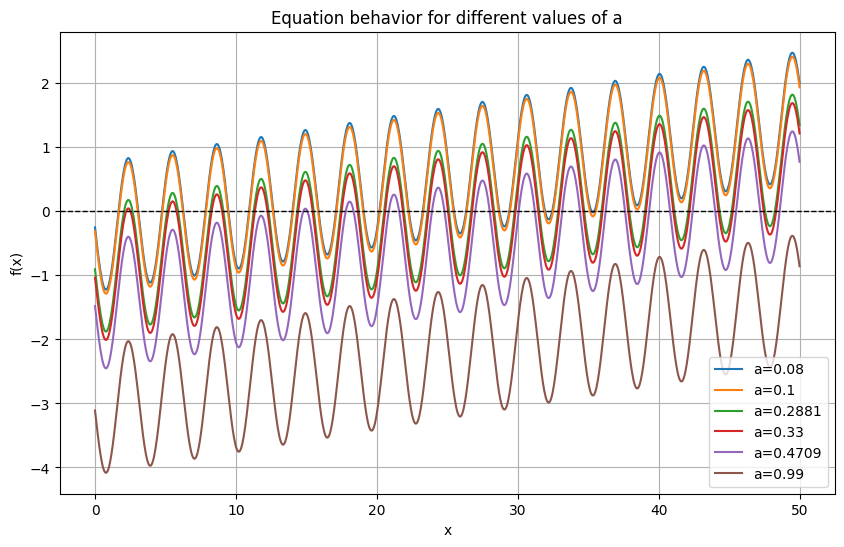

In [184]:
def equation_plot(x, a):
    return ((np.pi * x) / 90) - (2 * np.sin(x) * np.cos(x)) - a * np.pi

x_values = np.linspace(0, 50, 1000)
a_values = [0.08, 0.1, 0.2881, 0.33, 0.4709, 0.99]

plt.figure(figsize=(10, 6))
for a in a_values:
    y_values = equation_plot(x_values, a)
    plt.plot(x_values, y_values, label=f'a={a}')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Equation behavior for different values of a')
plt.legend()
plt.grid(True)
plt.show()


In [168]:
def equation(x, a):
    return ((np.pi * x) / 90) - (2 * np.sin(x) * np.cos(x)) - a * np.pi

initial_guess = 4.6
root = fsolve(equation, initial_guess, args=(0.1,))
root

array([7.8736453])

In [165]:
# Find the initial guess for the root
def find_initial_guess(a, start=0, end=90, step=0.1):
    x_values = np.arange(start, end, step)
    for x0 in x_values:
        if np.sign(equation(x0, a)) != np.sign(equation(x0 + step, a)):
            return x0
    return None

initial_guess = find_initial_guess(0.1)
print("Initial guess:", initial_guess)

Initial guess: 1.6


In [181]:
def find_initial_guess(a, start=0, end=90, step=0.1):
    x_values = np.arange(start, end, step)
    for x0 in x_values:
        if np.sign(equation(x0, a)) != np.sign(equation(x0 + step, a)):
            return x0
    return None

def equation(x, a):
    return ((np.pi * x) / 90) - (2 * np.sin(x) * np.cos(x)) - a * np.pi

def solve_for_x(a, initial_guess):
    if a == 0:
        return 0
    solution = fsolve(equation, initial_guess, args=(a,))
    return solution[0]

def calculate_x_values(df):
    result_df = df.copy()
    for index, row in df.iterrows():
        best_angles = None
        best_diff = float('inf')
        
        for offset in np.arange(0, 150, 3):
            angles = []
            valid_angles = True
            
            for i in range(1, 10):
                a_value = row[f"X{i}"]
                if a_value == 0:
                    angle = 0
                else:
                    initial_guess = find_initial_guess(a_value) + offset
                    try:
                        angle = solve_for_x(a_value, initial_guess)
                        # Ensure angle is greater than 0
                        if angle <= 0: 
                            valid_angles = False
                            break
                    except ValueError as e:
                        print(f"Index {index}, X{i}, a={a_value}: {e}")
                        angle = np.nan
                        valid_angles = False
                        break
                angles.append(angle)
            
            if valid_angles:
                angle_sum = sum(angles)
                diff = abs(90 - angle_sum)
                if diff < best_diff:
                    best_diff = diff
                    best_angles = angles

            if best_diff < 0.1:
                break

        for i in range(1, 10):
            result_df.loc[index, f"X{i}_angle"] = best_angles[i - 1] if best_angles else np.nan

    return result_df

result_df = calculate_x_values(merged_df)
for index, row in result_df.iterrows():
    print(f"Index {index}:")
    for i in range(1, 10):
        x_value = row[f"X{i}"]
        x_angle = row[f"X{i}_angle"]
        print(f"  X{i}: {x_value}, X{i}_angle: {x_angle}")

for index, row in result_df.iterrows():
    total_angle = sum(row[f"X{i}_angle"] for i in range(1, 10))
    print(f"Index {index}, total_angle: {total_angle}")


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the las

Index 0:
  X1: 0.176595707865445, X1_angle: 17.254990141673826
  X2: 0.130452435507047, X2_angle: 17.183189695334136
  X3: 0.0, X3_angle: 0.0
  X4: 0.277718661901317, X4_angle: 17.412686040075855
  X5: 0.0, X5_angle: 0.0
  X6: 0.334386380644337, X6_angle: 17.50623761421902
  X7: 0.0, X7_angle: 0.0
  X8: 0.0, X8_angle: 0.0
  X9: 0.0808468140818537, X9_angle: 17.103682110294383
Index 1:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.0, X3_angle: 0.0
  X4: 0.0, X4_angle: 0.0
  X5: 0.662506365258785, X5_angle: 51.97151005625157
  X6: 0.0, X6_angle: 0.0
  X7: 0.193409565157925, X7_angle: 20.368568178102425
  X8: 0.14408406958329, X8_angle: 22.154372245418983
  X9: 0.0, X9_angle: 0.0
Index 2:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.330005648455997, X3_angle: 20.582312222940267
  X4: 0.0, X4_angle: 0.0
  X5: 0.0, X5_angle: 0.0
  X6: 0.25026703921508, X6_angle: 20.456469449603855
  X7: 0.0, X7_angle: 0.0
  X8: 0.163154720172525, X8_angle: 20.321314900958335
  X9: 0

In [156]:
def find_initial_guess(a, start=0, end=90, step=0.1):
    x_values = np.arange(start, end, step)
    for x0 in x_values:
        if np.sign(equation(x0, a)) != np.sign(equation(x0 + step, a)):
            return x0
    return None

def equation(x, a):
    return ((np.pi * x) / 90) - (2 * np.sin(x) * np.cos(x)) - a * np.pi

# Function to solve for x using root
def solve_for_x(a):
    if a == 0:
        return 0
    # Adjust the range of initial guesses based on the value of 'a'
    initial_guess = find_initial_guess(a)
    solution = fsolve(equation, initial_guess, args=(a,))
    return solution[0]

# Calculate the new DataFrame with x values
def calculate_x_values(df):
    result_df = df.copy()
    for index, row in df.iterrows():
        angles = []
        for i in range(1, 10):
            a_value = row[f"X{i}"]
            if a_value == 0:
                angle = 0
            else:
                try:
                    angle = solve_for_x(a_value)
                except ValueError as e:
                    print(f"Index {index}, X{i}, a={a_value}: {e}")
                    angle = np.nan
            angles.append(angle)
            result_df.loc[index, f"X{i}_angle"] = angle
        
        # Normalize the angles to sum up to 90 degrees
        angle_sum = sum(angles)
        if angle_sum > 0:
            scale_factor = 90 / angle_sum
            for i in range(1, 10):
                result_df.loc[index, f"X{i}_angle"] = result_df.loc[index, f"X{i}_angle"] * scale_factor
    
    return result_df

result_df = calculate_x_values(merged_df)
for index, row in result_df.iterrows():
    print(f"Index {index}:")
    for i in range(1, 10):
        x_value = row[f"X{i}"]
        x_angle = row[f"X{i}_angle"]
        print(f"  X{i}: {x_value}, X{i}_angle: {x_angle}")


Index 0:
  X1: 0.176595707865445, X1_angle: 17.27662003789924
  X2: 0.130452435507047, X2_angle: 16.534601940972216
  X3: 0.0, X3_angle: 0.0
  X4: 0.277718661901317, X4_angle: 19.24510225802385
  X5: 0.0, X5_angle: 0.0
  X6: 0.334386380644337, X6_angle: 21.16199138128559
  X7: 0.0, X7_angle: 0.0
  X8: 0.0, X8_angle: 0.0
  X9: 0.0808468140818537, X9_angle: 15.7816843818191
Index 1:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.0, X3_angle: 0.0
  X4: 0.0, X4_angle: 0.0
  X5: 0.662506365258785, X5_angle: 81.21668307617546
  X6: 0.0, X6_angle: 0.0
  X7: 0.193409565157925, X7_angle: 4.495855621632303
  X8: 0.14408406958329, X8_angle: 4.2874613021922325
  X9: 0.0, X9_angle: 0.0
Index 2:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.330005648455997, X3_angle: 24.984437116358798
  X4: 0.0, X4_angle: 0.0
  X5: 0.0, X5_angle: 0.0
  X6: 0.25026703921508, X6_angle: 22.246911199230436
  X7: 0.0, X7_angle: 0.0
  X8: 0.163154720172525, X8_angle: 20.362902088678975
  X9: 0.2565

## --------------DIVIDE LINE-----------------

In [52]:
# Function to calculate angles based on ratios
def calculate_angles(df):
    result_df = df.copy()
    for index, row in df.iterrows():
        total_ratio = sum(row[f"X{i}"] for i in range(1, 10))
        if total_ratio == 0:
            total_ratio = 1  # To avoid division by zero
        
        for i in range(1, 10):
            ratio = row[f"X{i}"]
            angle = (ratio / total_ratio) * 180
            result_df.loc[index, f"X{i}_angle"] = angle
    
    return result_df

# Calculate angles
result_df = calculate_angles(merged_df)
for index, row in result_df.iterrows():
    print(f"Index {index}:")
    for i in range(1, 10):
        x_value = row[f"X{i}"]
        x_angle = row[f"X{i}_angle"]
        print(f"  X{i}: {x_value}, X{i}_angle: {x_angle}")

for index, row in result_df.iterrows():
    total_angle = sum(row[f"X{i}_angle"] for i in range(1, 10))
    print(f"Index {index}, total_angle: {total_angle}")


Index 0:
  X1: 0.176595707865445, X1_angle: 31.787227415780112
  X2: 0.130452435507047, X2_angle: 23.48143839126847
  X3: 0.0, X3_angle: 0.0
  X4: 0.277718661901317, X4_angle: 49.98935914223708
  X5: 0.0, X5_angle: 0.0
  X6: 0.334386380644337, X6_angle: 60.18954851598068
  X7: 0.0, X7_angle: 0.0
  X8: 0.0, X8_angle: 0.0
  X9: 0.0808468140818537, X9_angle: 14.55242653473367
Index 1:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.0, X3_angle: 0.0
  X4: 0.0, X4_angle: 0.0
  X5: 0.662506365258785, X5_angle: 119.2511457465813
  X6: 0.0, X6_angle: 0.0
  X7: 0.193409565157925, X7_angle: 34.8137217284265
  X8: 0.14408406958329, X8_angle: 25.935132524992202
  X9: 0.0, X9_angle: 0.0
Index 2:
  X1: 0.0, X1_angle: 0.0
  X2: 0.0, X2_angle: 0.0
  X3: 0.330005648455997, X3_angle: 59.40101672207953
  X4: 0.0, X4_angle: 0.0
  X5: 0.0, X5_angle: 0.0
  X6: 0.25026703921508, X6_angle: 45.048067058714444
  X7: 0.0, X7_angle: 0.0
  X8: 0.163154720172525, X8_angle: 29.367849631054533
  X9: 0.25657

In [180]:
result_df.to_csv("../Frontend/src/data/kosaraChart.csv", index=False)

In [41]:
with h5py.File("../Data/Filtered_feature_bc_matrix.h5", "r") as file:
    # genes = [name.decode('utf-8') for name in file['matrix/features/name'][:]]
    genes = pd.read_csv("../Data/Genes.csv")
    genes = list(genes["gene"])
    barcodes = [barcode.decode("utf-8") for barcode in file["matrix/barcodes"][:]]

    data = file["matrix/data"][:]
    indices = file["matrix/indices"][:]
    indptr = file["matrix/indptr"][:]
    shape = file["matrix/shape"][:]  # (31053, 3499)

    print("Data length:", len(data))
    print("Indices length:", len(indices))
    print("Indptr length:", len(indptr), "Expected:", shape[0] + 1)
    print("Shape:", shape)

    matrix = sparse.csc_matrix((data, indices, indptr), shape=shape)

    df = pd.DataFrame(matrix.toarray(), index=genes, columns=barcodes).transpose()
    # df.fillna(0, inplace=True)

    df.to_csv("output.csv")

df

Data length: 13742662
Indices length: 13742662
Indptr length: 3500 Expected: 31054
Shape: [31053  3499]


Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
AAACAAGTATCTCCCA-1     0       0        0    0      0        0       2   
AAACACCAATAACTGC-1     0       0        0    0      0        0       0   
AAACAGAGCGACTCCT-1     0       0        0    0      0        0       1   
AAACAGGGTCTATATT-1     0       0        0    0      0        0       0   
AAACATTTCCCGGATT-1     0       0        0    0      0        0       0   
...                  ...     ...      ...  ...    ...      ...     ...   
TTGTTGTGTGTCAAGA-1     0       0        0    0      0        0       1   
TTGTTTCACATCCAGG-1     1       0        0    0      0        0       0   
TTGTTTCATTAGTCTA-1     0       0        0    0      0        0       0   
TTGTTTCCATACAACT-1     0       0        0    0      0        0       3   
TTGTTTGTGTAAATTC-1     0       0        0    0      0        0       2   

                    Lypla1  Gm37988  Tcea1  ...  AC125149.1  AC125149.2  \
AAACAAGTATCTCCCA-1       0        0      0  ...           0           0   
AAACACCAATAACTGC-1       0        0      0  ...           0           0   
AAACAGAGCGACTCCT-1       0        0      0  ...           0           0   
AAACAGGGTCTATATT-1       0        0      0  ...           0           0   
AAACATTTCCCGGATT-1       0        0      0  ...           0           0   
...                    ...      ...    ...  ...         ...         ...   
TTGTTGTGTGTCAAGA-1       0        0      0  ...           0           0   
TTGTTTCACATCCAGG-1       0        0      0  ...           0           0   
TTGTTTCATTAGTCTA-1       0        0      0  ...           0           0   
TTGTTTCCATACAACT-1       0        0      3  ...           0           0   
TTGTTTGTGTAAATTC-1       0        0      0  ...           0           0   

                    AC125149.4  AC234645.1  AC168977.2  AC168977.1  \
AAACAAGTATCTCCCA-1           0           0           0           0   
AAACACCAATAACTGC-1           0           0           0           0   
AAACAGAGCGACTCCT-1           0           0           0           0   
AAACAGGGTCTATATT-1           0           0           0           0   
AAACATTTCCCGGATT-1           0           0           0           0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1           0           0           0           0   
TTGTTTCACATCCAGG-1           0           0           0           0   
TTGTTTCATTAGTCTA-1           0           0           0           0   
TTGTTTCCATACAACT-1           0           0           0           0   
TTGTTTGTGTAAATTC-1           0           0           0           0   

                    AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  
AAACAAGTATCTCCCA-1           0               0         0               0  
AAACACCAATAACTGC-1           0               0         0               0  
AAACAGAGCGACTCCT-1           2               0         0               0  
AAACAGGGTCTATATT-1           0               0         0               0  
AAACATTTCCCGGATT-1           0               0         0               0  
...                        ...             ...       ...             ...  
TTGTTGTGTGTCAAGA-1           1               0         0               0  
TTGTTTCACATCCAGG-1           1               0         0               0  
TTGTTTCATTAGTCTA-1           0               0         0               0  
TTGTTTCCATACAACT-1           1               0         0               0  
TTGTTTGTGTAAATTC-1           2               0         0               0  

[3499 rows x 31053 columns]

In [22]:
# check dupilcate gene names
adata = sc.read_10x_h5("../Data/Filtered_feature_bc_matrix.h5")

umi_counts = adata.to_df()

umi_counts.reset_index(inplace=True)
umi_counts
# gene_names = adata.var_names

# duplicate_gene_names = gene_names[gene_names.duplicated()]
# print(duplicate_gene_names)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


index  Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
0     AAACAAGTATCTCCCA-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   
1     AAACACCAATAACTGC-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
2     AAACAGAGCGACTCCT-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3     AAACAGGGTCTATATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
4     AAACATTTCCCGGATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
...                  ...   ...     ...      ...  ...    ...      ...     ...   
3494  TTGTTGTGTGTCAAGA-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3495  TTGTTTCACATCCAGG-1   1.0     0.0      0.0  0.0    0.0      0.0     0.0   
3496  TTGTTTCATTAGTCTA-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
3497  TTGTTTCCATACAACT-1   0.0     0.0      0.0  0.0    0.0      0.0     3.0   
3498  TTGTTTGTGTAAATTC-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   

      Lypla1  Gm37988  ...  AC125149.1  AC125149.2  AC125149.4  AC234645.1  \
0        0.0      0.0  ...         0.0         0.0         0.0         0.0   
1        0.0      0.0  ...         0.0         0.0         0.0         0.0   
2        0.0      0.0  ...         0.0         0.0         0.0         0.0   
3        0.0      0.0  ...         0.0         0.0         0.0         0.0   
4        0.0      0.0  ...         0.0         0.0         0.0         0.0   
...      ...      ...  ...         ...         ...         ...         ...   
3494     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3495     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3496     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3497     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3498     0.0      0.0  ...         0.0         0.0         0.0         0.0   

      AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  Vmn2r122  \
0            0.0         0.0         0.0             0.0       0.0   
1            0.0         0.0         0.0             0.0       0.0   
2            0.0         0.0         2.0             0.0       0.0   
3            0.0         0.0         0.0             0.0       0.0   
4            0.0         0.0         0.0             0.0       0.0   
...          ...         ...         ...             ...       ...   
3494         0.0         0.0         1.0             0.0       0.0   
3495         0.0         0.0         1.0             0.0       0.0   
3496         0.0         0.0         0.0             0.0       0.0   
3497         0.0         0.0         1.0             0.0       0.0   
3498         0.0         0.0         2.0             0.0       0.0   

      CAAA01147332.1  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
3494             0.0  
3495             0.0  
3496             0.0  
3497             0.0  
3498             0.0  

[3499 rows x 31054 columns]

In [21]:
# Using scanpy to read the h5 file
adata = sc.read_10x_h5("../Data/Filtered_feature_bc_matrix.h5")
tSNE_cluster_df = pd.read_csv("../Data/t-SNE_Graph_Based.csv")
adata.var_names_make_unique()

umi_counts = adata.to_df()
total_counts = umi_counts.sum(axis=1)

cellTotal_df = pd.DataFrame(
    {"barcode": total_counts.index, "total_counts": total_counts.values}
)
tSNE_cluster_df.rename(columns={'Barcode': 'barcode', 'Graph-based': 'cluster'}, inplace=True)
cell_cluster_df = pd.merge(cellTotal_df, tSNE_cluster_df, on="barcode")
cell_cluster_df


/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


barcode  total_counts    cluster
0     AAACAAGTATCTCCCA-1       12174.0  Cluster 2
1     AAACACCAATAACTGC-1        5637.0  Cluster 4
2     AAACAGAGCGACTCCT-1       26316.0  Cluster 6
3     AAACAGGGTCTATATT-1        6462.0  Cluster 5
4     AAACATTTCCCGGATT-1        7195.0  Cluster 2
...                  ...           ...        ...
3494  TTGTTGTGTGTCAAGA-1        6219.0  Cluster 5
3495  TTGTTTCACATCCAGG-1       14493.0  Cluster 1
3496  TTGTTTCATTAGTCTA-1        6621.0  Cluster 3
3497  TTGTTTCCATACAACT-1       18042.0  Cluster 7
3498  TTGTTTGTGTAAATTC-1        8170.0  Cluster 3

[3499 rows x 3 columns]

In [56]:
# total_counts = umi_counts.sum(axis=1)
# total_counts
umi_counts

index  Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
0     AAACAAGTATCTCCCA-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   
1     AAACACCAATAACTGC-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
2     AAACAGAGCGACTCCT-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3     AAACAGGGTCTATATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
4     AAACATTTCCCGGATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
...                  ...   ...     ...      ...  ...    ...      ...     ...   
3494  TTGTTGTGTGTCAAGA-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3495  TTGTTTCACATCCAGG-1   1.0     0.0      0.0  0.0    0.0      0.0     0.0   
3496  TTGTTTCATTAGTCTA-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
3497  TTGTTTCCATACAACT-1   0.0     0.0      0.0  0.0    0.0      0.0     3.0   
3498  TTGTTTGTGTAAATTC-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   

      Lypla1  Gm37988  ...  AC125149.1  AC125149.2  AC125149.4  AC234645.1  \
0        0.0      0.0  ...         0.0         0.0         0.0         0.0   
1        0.0      0.0  ...         0.0         0.0         0.0         0.0   
2        0.0      0.0  ...         0.0         0.0         0.0         0.0   
3        0.0      0.0  ...         0.0         0.0         0.0         0.0   
4        0.0      0.0  ...         0.0         0.0         0.0         0.0   
...      ...      ...  ...         ...         ...         ...         ...   
3494     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3495     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3496     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3497     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3498     0.0      0.0  ...         0.0         0.0         0.0         0.0   

      AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  Vmn2r122  \
0            0.0         0.0         0.0             0.0       0.0   
1            0.0         0.0         0.0             0.0       0.0   
2            0.0         0.0         2.0             0.0       0.0   
3            0.0         0.0         0.0             0.0       0.0   
4            0.0         0.0         0.0             0.0       0.0   
...          ...         ...         ...             ...       ...   
3494         0.0         0.0         1.0             0.0       0.0   
3495         0.0         0.0         1.0             0.0       0.0   
3496         0.0         0.0         0.0             0.0       0.0   
3497         0.0         0.0         1.0             0.0       0.0   
3498         0.0         0.0         2.0             0.0       0.0   

      CAAA01147332.1  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
3494             0.0  
3495             0.0  
3496             0.0  
3497             0.0  
3498             0.0  

[3499 rows x 31054 columns]

In [17]:
total_counts = umi_counts.sum(axis=1)
cellTotal_df = pd.DataFrame(
    {"barcode": total_counts.index, "total_counts": total_counts.values}
)
cellTotal_df

barcode  total_counts
0     AAACAAGTATCTCCCA-1       12174.0
1     AAACACCAATAACTGC-1        5637.0
2     AAACAGAGCGACTCCT-1       26316.0
3     AAACAGGGTCTATATT-1        6462.0
4     AAACATTTCCCGGATT-1        7195.0
...                  ...           ...
3494  TTGTTGTGTGTCAAGA-1        6219.0
3495  TTGTTTCACATCCAGG-1       14493.0
3496  TTGTTTCATTAGTCTA-1        6621.0
3497  TTGTTTCCATACAACT-1       18042.0
3498  TTGTTTGTGTAAATTC-1        8170.0

[3499 rows x 2 columns]

In [64]:
umi_counts.rename(columns={"index": "barcode"}, inplace=True)
umi_counts["total_counts"] = umi_counts.drop(columns=["barcode"]).sum(axis=1)
umi_counts

barcode  Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
0     AAACAAGTATCTCCCA-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   
1     AAACACCAATAACTGC-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
2     AAACAGAGCGACTCCT-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3     AAACAGGGTCTATATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
4     AAACATTTCCCGGATT-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
...                  ...   ...     ...      ...  ...    ...      ...     ...   
3494  TTGTTGTGTGTCAAGA-1   0.0     0.0      0.0  0.0    0.0      0.0     1.0   
3495  TTGTTTCACATCCAGG-1   1.0     0.0      0.0  0.0    0.0      0.0     0.0   
3496  TTGTTTCATTAGTCTA-1   0.0     0.0      0.0  0.0    0.0      0.0     0.0   
3497  TTGTTTCCATACAACT-1   0.0     0.0      0.0  0.0    0.0      0.0     3.0   
3498  TTGTTTGTGTAAATTC-1   0.0     0.0      0.0  0.0    0.0      0.0     2.0   

      Lypla1  Gm37988  ...  AC125149.2  AC125149.4  AC234645.1  AC168977.2  \
0        0.0      0.0  ...         0.0         0.0         0.0         0.0   
1        0.0      0.0  ...         0.0         0.0         0.0         0.0   
2        0.0      0.0  ...         0.0         0.0         0.0         0.0   
3        0.0      0.0  ...         0.0         0.0         0.0         0.0   
4        0.0      0.0  ...         0.0         0.0         0.0         0.0   
...      ...      ...  ...         ...         ...         ...         ...   
3494     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3495     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3496     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3497     0.0      0.0  ...         0.0         0.0         0.0         0.0   
3498     0.0      0.0  ...         0.0         0.0         0.0         0.0   

      AC168977.1  AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  \
0            0.0         0.0             0.0       0.0             0.0   
1            0.0         0.0             0.0       0.0             0.0   
2            0.0         2.0             0.0       0.0             0.0   
3            0.0         0.0             0.0       0.0             0.0   
4            0.0         0.0             0.0       0.0             0.0   
...          ...         ...             ...       ...             ...   
3494         0.0         1.0             0.0       0.0             0.0   
3495         0.0         1.0             0.0       0.0             0.0   
3496         0.0         0.0             0.0       0.0             0.0   
3497         0.0         1.0             0.0       0.0             0.0   
3498         0.0         2.0             0.0       0.0             0.0   

      total_counts  
0          24348.0  
1          11274.0  
2          52632.0  
3          12924.0  
4          14390.0  
...            ...  
3494       12438.0  
3495       28986.0  
3496       13242.0  
3497       36084.0  
3498       16340.0  

[3499 rows x 31055 columns]

In [87]:
# Check if the gene names in the two files are the same
df_test_1 = gene_df["Gene"]
df_test_2 = genes["gene"]

diff_from_df1 = df_test_1[~df_test_1.isin(df_test_2)]
diff_from_df2 = df_test_2[~df_test_2.isin(df_test_1)]

print("Values in file1 not in file2:")
print(diff_from_df1)

print("\nValues in file2 not in file1:")
print(diff_from_df2)

Values in file1 not in file2:
Series([], Name: Gene, dtype: object)

Values in file2 not in file1:
Series([], Name: gene, dtype: object)


In [23]:
# Read the loom file
with loompy.connect("../Data/parsing_output.loom") as ds:
    expression_df = pd.DataFrame(
        data=ds[:, :], columns=ds.ca["CellID"], index=ds.ra["Gene"]
    )

gene_list = expression_df.index.tolist()
gene_df = pd.DataFrame(gene_list, columns=["Gene"])

gene_df.to_csv("gene_list.csv", index=False)

In [71]:
CountMatrix = collections.namedtuple(
    "CountMatrix", ["feature_ref", "barcodes", "matrix"]
)


def get_matrix_from_h5(filename):
    with tables.open_file(filename, "r") as f:
        mat_group = f.get_node(f.root, "matrix")
        barcodes = f.get_node(mat_group, "barcodes").read()
        data = getattr(mat_group, "data").read()
        indices = getattr(mat_group, "indices").read()
        indptr = getattr(mat_group, "indptr").read()
        shape = getattr(mat_group, "shape").read()
        matrix = sp_sparse.csc_matrix((data, indices, indptr), shape=shape)

        feature_ref = {}
        feature_group = f.get_node(mat_group, "features")
        feature_ids = getattr(feature_group, "id").read()
        feature_names = getattr(feature_group, "name").read()
        feature_types = getattr(feature_group, "feature_type").read()
        feature_ref["id"] = feature_ids
        feature_ref["name"] = feature_names
        feature_ref["feature_type"] = feature_types
        tag_keys = getattr(feature_group, "_all_tag_keys").read()
        for key in tag_keys:
            key = key.decode("utf-8")
            feature_ref[key] = getattr(feature_group, key).read()

        return CountMatrix(feature_ref, barcodes, matrix)


filtered_matrix_h5 = "../Data/Filtered_feature_bc_matrix.h5"
filtered_feature_bc_matrix = get_matrix_from_h5(filtered_matrix_h5)
filtered_feature_bc_matrix

CountMatrix(feature_ref={'id': array([b'ENSMUSG00000051951', b'ENSMUSG00000089699',
       b'ENSMUSG00000102343', ..., b'ENSMUSG00000063897',
       b'ENSMUSG00000096730', b'ENSMUSG00000095742'], dtype='|S18'), 'name': array([b'Xkr4', b'Gm1992', b'Gm37381', ..., b'CAAA01118383.1',
       b'Vmn2r122', b'CAAA01147332.1'], dtype='|S16'), 'feature_type': array([b'Gene Expression', b'Gene Expression', b'Gene Expression', ...,
       b'Gene Expression', b'Gene Expression', b'Gene Expression'],
      dtype='|S15'), 'genome': array([b'mm10-3.0.0_premrna', b'mm10-3.0.0_premrna',
       b'mm10-3.0.0_premrna', ..., b'mm10-3.0.0_premrna',
       b'mm10-3.0.0_premrna', b'mm10-3.0.0_premrna'], dtype='|S18')}, barcodes=array([b'AAACAAGTATCTCCCA-1', b'AAACACCAATAACTGC-1',
       b'AAACAGAGCGACTCCT-1', ..., b'TTGTTTCATTAGTCTA-1',
       b'TTGTTTCCATACAACT-1', b'TTGTTTGTGTAAATTC-1'], dtype='|S18'), matrix=<31053x3499 sparse matrix of type '<class 'numpy.int32'>'
	with 13742662 stored elements in Compres

In [81]:
feature_ref_df = pd.DataFrame(
    {
        key: [
            item.decode("utf-8") if isinstance(item, bytes) else item for item in value
        ]
        for key, value in filtered_feature_bc_matrix.feature_ref.items()
    }
)

barcodes_df = pd.DataFrame(filtered_feature_bc_matrix.barcodes, columns=["barcodes"])

matrix_df = pd.DataFrame.sparse.from_spmatrix(
    filtered_feature_bc_matrix.matrix,
    index=feature_ref_df["name"],
    columns=[
        barcode.decode("utf-8") for barcode in filtered_feature_bc_matrix.barcodes
    ],
)
duplicate_names = feature_ref_df["name"][feature_ref_df["name"].duplicated(keep=False)]

duplicate_names_list = duplicate_names.tolist()
duplicate_names_list
# barcodes_df
# matrix_test = matrix_df.T
# matrix_test

['Sept2',
 'Sept2',
 'Kiss1',
 'Kiss1',
 'Zc3h11a',
 'Zc3h11a',
 'Gm16701',
 'Gm16701',
 'Hoxd4',
 'Hoxd4',
 'Gm2464',
 'Gm2464',
 'Vmn2r7',
 'Vmn2r7',
 'Ccl21b',
 'Il11ra2',
 'Ccl19',
 'Ccl21a',
 'Gm28710',
 'Gm28710',
 'Jakmip1',
 'Jakmip1',
 'Gm3286',
 'Gm16499',
 'Gm16499',
 'Zfp865',
 'Zfp865',
 'Olfr290',
 'Olfr290',
 'Aldoa',
 'Aldoa',
 'Dpep2',
 'Dpep2',
 'St6galnac2',
 'St6galnac2',
 'Hgs',
 'Hgs',
 'Vmn1r216',
 'Vmn1r216',
 'Nnt',
 'Nnt',
 'Gm35558',
 'Gm35558',
 'Ighv5-8',
 'Ighv5-8',
 'Ighv1-13',
 'Ighv1-13',
 'Gcat',
 'Gcat',
 'Pick1',
 'Pick1',
 'Atp5o',
 'Atp5o',
 'Pcdha11',
 'Pcdha11',
 'Nudt8',
 'Nudt8',
 'Lbhd1',
 'Lbhd1',
 'Ints5',
 'Ints5',
 'Ccl21b',
 'Ccl21c',
 'Il11ra2',
 'Ccl27',
 'Ccl21c',
 'Gm3286',
 'Ccl27',
 'Il11ra2',
 'Ccl19',
 'Ccl21a']

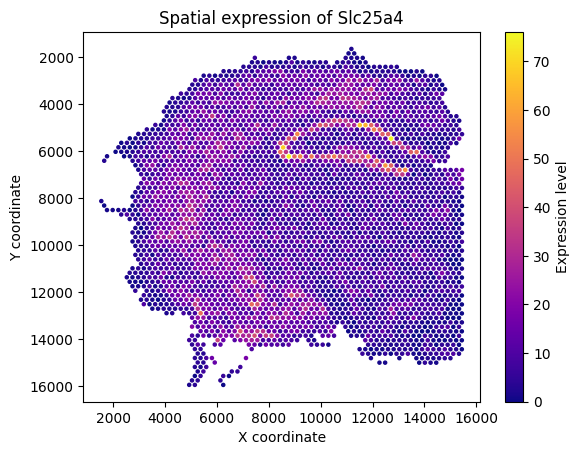

In [98]:
# Viewing the gene expression of a gene of interest
gene_of_interest = "Slc25a4"

# Create a scatter plot of the expression of the gene of interest
plt.scatter(
    positions["x"], positions["y"], c=umi_counts[gene_of_interest], cmap="plasma", s=5
)
plt.colorbar(label="Expression level")
plt.title(f"Spatial expression of {gene_of_interest}")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")

plt.gca().invert_yaxis()
plt.show()

In [39]:
aligned_data = pd.merge(barcode_positions, df_precise, on='barcode')
aligned_data.drop(columns=['radius'], inplace=True)
aligned_data
# gene_of_interest = "Gm1992"

# plt.scatter(
#     aligned_data["x"],
#     aligned_data["y"],
#     c=aligned_data[gene_of_interest],
#     cmap="plasma",
#     s=5
# )
# plt.colorbar(label="Expression level")
# plt.title(f"Spatial expression of {gene_of_interest}")
# plt.xlabel("X coordinate")
# plt.ylabel("Y coordinate")
# plt.gca().invert_yaxis()
# plt.show()


barcode        x        y  Xkr4  Gm1992  Gm37381  Rp1  Sox17  \
0     AAACAAGTATCTCCCA-1  12709.0  10806.0     0       0        0    0      0   
1     AAACACCAATAACTGC-1   3616.0  12513.0     0       0        0    0      0   
2     AAACAGAGCGACTCCT-1  11839.0   3944.0     0       0        0    0      0   
3     AAACAGGGTCTATATT-1   2961.0  10225.0     0       0        0    0      0   
4     AAACATTTCCCGGATT-1  12159.0  12902.0     0       0        0    0      0   
...                  ...      ...      ...   ...     ...      ...  ...    ...   
3494  TTGTTGTGTGTCAAGA-1   9974.0   7183.0     0       0        0    0      0   
3495  TTGTTTCACATCCAGG-1   6136.0  12325.0     1       0        0    0      0   
3496  TTGTTTCATTAGTCTA-1   4821.0  12705.0     0       0        0    0      0   
3497  TTGTTTCCATACAACT-1   4495.0   9846.0     0       0        0    0      0   
3498  TTGTTTGTGTAAATTC-1   7130.0   2606.0     0       0        0    0      0   

      Gm37323  Mrpl15  ...  AC125149.1  AC125149.2  AC125149.4  AC234645.1  \
0           0       2  ...           0           0           0           0   
1           0       0  ...           0           0           0           0   
2           0       1  ...           0           0           0           0   
3           0       0  ...           0           0           0           0   
4           0       0  ...           0           0           0           0   
...       ...     ...  ...         ...         ...         ...         ...   
3494        0       1  ...           0           0           0           0   
3495        0       0  ...           0           0           0           0   
3496        0       0  ...           0           0           0           0   
3497        0       3  ...           0           0           0           0   
3498        0       2  ...           0           0           0           0   

      AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  Vmn2r122  \
0              0           0           0               0         0   
1              0           0           0               0         0   
2              0           0           2               0         0   
3              0           0           0               0         0   
4              0           0           0               0         0   
...          ...         ...         ...             ...       ...   
3494           0           0           1               0         0   
3495           0           0           1               0         0   
3496           0           0           0               0         0   
3497           0           0           1               0         0   
3498           0           0           2               0         0   

      CAAA01147332.1  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3494               0  
3495               0  
3496               0  
3497               0  
3498               0  

[3499 rows x 31056 columns]